# Building a regression forest using scikit-learn
* We'll use the RandomForestRegressor package to build our model:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

* We'll use the California Dataset House pricing: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html



# Step 1: Loading the dataset

In [1]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

# We'll predict the last 10 samples (it will be our testing set)
num_test = 10

# Splitting our data
X_train = housing.data[:-num_test, :]
y_train = housing.target[:-num_test]
X_test =  housing.data[-num_test:, :]
y_test =  housing.target[-num_test:]


# Step 2: Building our RandomForestRegressor model


In [2]:
from sklearn.ensemble import RandomForestRegressor
# We'll set 1000 estimators, max depth of 10 and min samples per split of 3
regressor = RandomForestRegressor(n_estimators = 1000,max_depth = 10, min_samples_split = 3)

# Train the model
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=3, n_estimators=1000)

# Step 3: Predicting House Prices and Evaluating the model

In [7]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Predicting on the testing dataset
predictions = regressor.predict(X_test)

print(predictions)
print(f"R2 Score: {r2_score(y_test, predictions)}")
print(f"MSE Score: {mean_squared_error(y_test, predictions)}")
print(f"MAE Score: {mean_absolute_error(y_test, predictions)}")


[1.31002306 1.29300134 1.24499682 1.06769839 1.24645739 0.7750004
 0.92227889 0.83264491 0.88108589 0.90556388]
R2 Score: 0.32493818043180434
MSE Score: 0.013858107822278637
MAE Score: 0.09564603484122797


In [4]:
print(y_test)

[1.12  1.072 1.156 0.983 1.168 0.781 0.771 0.923 0.847 0.894]


## Visualizing the predictions


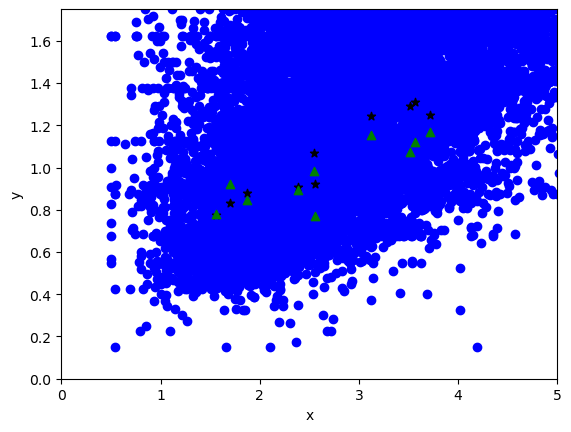

In [5]:
# Checking the model's performance on new samples
import matplotlib.pyplot as plt


# Plotting both the train values and the new predicted values
plt.scatter(X_train[:, 0], y_train, marker = "o", c = "b")
plt.scatter(X_test[:, 0], predictions, marker = "*", c = "k")
plt.scatter(X_test[:, 0], y_test, marker = "^", c = "g")

plt.xlim(0, 5)
plt.ylim(0, 1.75)

plt.xlabel("x")
plt.ylabel("y")

plt.show()

## Comparing results:

* We'll compare our results with decision trees:

## Predicted values and evaluation metrics for the decision trees (we'll compare them in the final step)
* [1.29568298 1.29568298 1.29568298 1.11946842 1.29568298 0.66193704 0.82554167 0.8546936  0.8546936  0.8546936 ]
* R2 Score: 0.22665529806669604
* MSE Score: 0.015875722715343116
* MAE Score: 0.1092111374822469

## Predicted values and metrics for the Random Forest:
* [1.31002306 1.29300134 1.24499682 1.06769839 1.24645739 0.7750004, 0.92227889 0.83264491 0.88108589 0.90556388]
R2 Score: 0.32493818043180434
MSE Score: 0.013858107822278637
MAE Score: 0.09564603484122797